# Numerical Method Term Paper 

## Cosmological Nucleosynthesis
### By Manish Jain

## Introduction
In this report, we shall consider the synthesis of elements on short time scales and at very high temperature in the early universe.  The time scales are typically of the order of $10-10^3$ sec, while the temperature range upward of $10^9 K$ . We shall consider the majority of the components in the universe to be electron, positron, photons and the neutrinos. Out Target is to find the evolution of the mass fraction of different nuclei thats been formed in the early universe from 10^10 to 10^8 K.\\
At around $10^12$ K, the stable nucleons in the universe are newutrons and protons and the weaker -interactions allow the neutrin-proton conversion through following processes:-
\begin{align}
n + \nu \rightleftharpoons p + e^{-}\\
n \rightleftharpoons p + e^{-} + \nu ^{-}\\
n +e^{+} \rightleftharpoons p +\nu
\end{align}
The differential equation governing the neutron fraction $X_n  =  n_n/n_N$ is 
\begin{align}
\frac{dX_n}{dt} =  -\lambda (n \rightarrow p) + \lambda (p \rightarrow n)(1-X_n)
\end{align}
where $n_N$ being the number density of nucleons and $\lambda$ is the reaction rates. 

At about 1 MeV, the neutrinos decouples from the plasma and at the same time the weak interactions starts to freeze out and possible lighter nuclei starts to produce from p, n reations such as Deutron ($H^2$), Tritium ($H^3$), $He^3$ and $\alpha$ particles $He^4$. We shall take into account 11 nuclear reactions as given below along with their reaction rates. 

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.integrate import solve_ivp,quad
from scipy.special import roots_laguerre
from scipy.interpolate import interp1d


In [2]:
hbar = 6.582e-22# (Planck constant / 2pi) / MeV s
c = 3e10# light velocity / cm/s
Grav = 6.7e-45# gravitaion constant / hbar c^5 MeV^-2
me = 0.51# electrom mass / MeV
rad_const = pi*pi/15# radiation constant / (hbar*c)^-3
mp = 938.3# proton mass / MeV
mn = 939.5# neutron mass / MeV
tau_n = 885.7# neutron mean lifetime / s
kB = 8.62e-11# Boltzmann constant / MeV/K
NA = 6.02e23# Avogadro number / mol^-1
amu = 931.5# atomic mass unit / MeV
zeta3 = 1.2# apery number

We shall consider following 11 reactions along with their reaction rates 
\begin{align*}
1) &p + n \rightleftharpoons d + \gamma;\\
     &4.742 \times 10^4 \times \left(1 - 0.850T_9^{1/2}  + 0.490T_9 - 0.0962T_9^{3/2} + 8.47 \times 10^{-3}T_9^2 - 2.80 \times 10^{-4}T_9^{5/2} \right)\\
2) &p + d \rightleftharpoons He^3 + \gamma;\\
 & 2.65 \times 10^3 T_9^{-2/3}  \exp \left(\frac{-3.720}{ T_9^{1/3}} \right) \times \left(1 + 0.112T_9^{1/3} + 1.99T_9^{2/3} + 1.56T_9 + 0.162T_9^{4/3} + 0.324T_9^{5/3} \right)\\
3) &d+d \rightleftharpoons He^3 + n\\
& 3.95 \times 10^8 T_9^{-\frac{2}{3}} \exp \left( -\frac{4.259}{ T_9^{\frac{1}{3}}} \right) \times \left(1 + 0.098T_9^{\frac{1}{3}} + 0.765T_9^{\frac{2}{3}} + 0.525T_9 + 9.61 \times 10^{-3} T_9^{\frac{4}{3}} + 0.0167T_9^{\frac{5}{3}} \right)\\
4) &d + d \rightleftharpoons ^3H + p:\\
&\ 4.17 \times 10^8 T_9^{-\frac{2}{3}} \exp \left(-\frac{4.258}{T_9^{\frac{1}{3}}} \right) \left(1 + 0.098T_9^{\frac{1}{3}} + 0.518T_9^{\frac{2}{3}} + 0.355T_9 - 0.010T_9^{\frac{4}{3}} - 0.018T_9^{\frac{5}{3}} \right)\\
5) &He^3 + n \rightleftharpoons H^3 + p\\
&7.21 \times 10^8 \left(1 - 0.508T_9^{\frac{1}{2}} + 0.228T_9 \right)\\
6) &H^3 + d \rightleftharpoons He^4 + n\\
& 1.063 \times 10^{11} T_9^{-\frac{2}{3}} \exp \left(-\frac{4.559} {T_9^{\frac{1}{3}}} \right) \left(1 + 0.092T_9^{\frac{1}{3}}- 0.375T_9^{\frac{2}{3}} - 0.242T_9 + 33.82T_9^{\frac{4}{3}} + 55.42T_9^{\frac{5}{3}} \right) + 8.047 \times 10^8 T_9^{-\frac{2}{3}} \exp \left(-0.4857 T_9 \right)\\
7) & He^3 +d \rightleftharpoons He^4 +p:\\
& 5.021 \times 10^{10} T_9^{-\frac{2}{3}} \exp \left( -\frac{7.144} {T_9^{\frac{1}{3}}} \right) \times \left( T_9^{0.270} \right)^2 \times \left(1 + 0.058T^{\frac{1}{3}_9} + 0.603T^{\frac{2}{3}_9} + 0.245T_9 + 6.97T^{\frac{4}{3}_9} + 7.19T^{\frac{5}{3}_9} \right) + 5.212 \times 10^8 T^{-\frac{1}{2}_9} \exp \left( -\frac{1.762} {T_9} \right)\\
8) &He^3 + He^4 \rightleftharpoons Be^7 + \gamma \\
&4.817 \times 10^6 T_9^{-\frac{2}{3}} \exp \left(-\frac{14.964} {T_9^{\frac{1}{3}}} \right) \left(1 + 0.0325 T_9^{\frac{1}{3}} - 1.04 \times 10^{-3} T_9^{\frac{2}{3}} - 2.37 \times 10^{-4} T_9 - 8.11 \times 10^{-5} T_9^{\frac{4}{3}} - 4.69 \times 10^{-5} T_9^{\frac{5}{3}} \right) + 5.938 \times 10^6 T_9^{-\frac{3}{2}} \left( \frac{T_9}{1 + 0.1071T_9} \right)^{\frac{5}{6}} \exp \left(-12.859 \frac{(1 + 0.1071T_9)^{\frac{1}{3}}}{T_9^{\frac{1}{3}}} \right)\\
9) & H^3 + He^4 \rightleftharpoons Li^7 + \gamma:\\
 & 3.032 \times 10^5 T_9^{-\frac{2}{3}} \exp \left(-\frac{8.090} {T_9^{\frac{1}{3}}} \right) \left(1 + 0.0516 T_9^{\frac{1}{3}} + 0.0229 T_9^{\frac{2}{3}} + 8.28 \times 10^{-3} T_9 - 3.28 \times 10^{-4} T_9^{\frac{4}{3}} - 3.01 \times 10^{-4} T_9^{\frac{5}{3}} \right) + 5.109 \times 10^5 T_9^{-\frac{3}{2}} \left( \frac{T_9}{1 + 0.1378T_9} \right)^{\frac{5}{6}} \exp \left(-8.068 \frac{(1 + 0.1378T_9)^{\frac{1}{3}}}{T_9^{\frac{1}{3}}} \right)\\
10) &Be^7 + n \to Li^7 + p \\
 &  2.675 \times 10^9 T_9^{-\frac{2}{3}} \left(1 - 0.560 T_9^{\frac{1}{2}} + 0.179 T_9 - 0.0283 T_9^{\frac{3}{2}} + 2.21 \times 10^{-3} T_9^2 - 6.85 \times 10^{-5} T_9^{\frac{5}{2}} \right) + 9.391 \times 10^8 \left(\frac{1}{1 + 13.076 T_9} \right)^{\frac{3}{2}} + 4.467 \times 10^7 T_9^{-\frac{3}{2}} \exp \left(-0.07486 T_9 \right)\\
11) &Li^7 + p \rightleftharpoons He^4 + He^4\\
& 1.096 \times 10^9 T_9^{-\frac{2}{3}} \exp \left(-\frac{8.472}{ T_9^{\frac{1}{3}}} \right) - 4.830 \times 10^8 T_9^{-\frac{3}{2}} \left(\frac{T_9}{1 + 0.759 T_9} \right)^{\frac{5}{6}} \exp \left(-8.472 \ast \left(1 + 0.759 T_9 \right)^{\frac{1}{3}} \right) + 1.06 \times 10^{10} T_9^{-\frac{3}{2}} \exp \left(-30.442 T_9 \right) + 1.56 \times 10^5 T_9^{-\frac{2}{3}} \exp \left(-8.472 T_9^{\frac{1}{3}} - \left(\frac{T_9}{1.696} \right)^2 \right) \times \left(1 + 0.049 T_9^{\frac{1}{3}} - 2.498 T_9^{\frac{2}{3}} + 0.860 T_9 + 3.518 T_9^{\frac{4}{3}} + 3.08 T_9^{\frac{5}{3}} \right) + 1.55 \times 10^6 T_9^{-\frac{3}{2}} \exp \left(-4.478 T_9 \right)
\end{align*}

In [138]:
class particle:
    def __init__(self, mass, spin, name):
        self.mass = mass
        self.spin = spin
        self.name = name
        self.mass_num = int(np.round(mass/amu))
        
    def __hash__(self):
        return hash((self.mass, self.spin))

proton = particle(938.272013, 2, 'proton')
neutron = particle(939.565346, 2, 'neutron')
deutron = particle(1875.612793, 3, 'deutron')
tritium = particle(2808.920906, 2, 'tritium')
helium3 = particle(2808.391383, 2, 'helium3')
helium4 = particle(3727.379109, 1, 'helium4')
lithium7 = particle(6533.833166, 4, 'lithium7')
beryllium7 = particle(6534.184060, 4, 'beryllium7')

reaction = [
    {'reactor':[neutron,proton], 'product':[deutron], 'use':True},
    {'reactor':[deutron,proton], 'product':[helium3], 'use':True},
    {'reactor':[deutron,deutron], 'product':[helium3,neutron], 'use':True},
    {'reactor':[deutron,deutron], 'product':[tritium,proton], 'use':True},
    {'reactor':[helium3,neutron], 'product':[tritium,proton], 'use':True},
    {'reactor':[tritium,deutron], 'product':[helium4,neutron], 'use':True},
    {'reactor':[helium3,deutron], 'product':[helium4,proton], 'use':True},
    {'reactor':[helium3,helium4], 'product':[beryllium7], 'use':True},
    {'reactor':[helium4,tritium], 'product':[lithium7], 'use':True},
    {'reactor':[beryllium7, neutron], 'product':[lithium7,proton], 'use':True},
    {'reactor':[lithium7, proton], 'product':[helium4,helium4], 'use':True }
]


mask = [r['use'] for r in reaction]
reaction = [{k:r[k] for k in ['reactor','product']}
            for r in reaction if r['use']] # remove unused reactions
element = list({p for r in reaction
                for q in r.values() for p in q})

In [109]:
# Defining reaction rate function which returns <σ v> (with dimension cm^3 s^-1) averaged over Maxwell distribution of v where σ is 
#the cross section 
def reaction_rate(T):
    """
    T = temperature / MeV
    return <sigma v> / cm^3 s^-1 averaged over Maxwell distribution of v where sigma = cross section of reaction 
    """
    T9 = T/kB*1e-9
    T912 = np.sqrt(T9)
    T932 = T9*T912
    T913 = T9**(1/3)
    T923 = T913**2
    T943 = T923**2
    T953 = T9*T923
    T9f = T9/(1 + 0.1071*T9)
    T9f13 = T9f**(1/3)
    T9f56 = T9f**(5/6)
    T9e = T9/(1 + 0.1378*T9)
    T9e13 = T9e**(1/3)
    T9e56 = T9e**(5/6)
    T9a = T9/(1 + 13.076*T9)
    T9a32 = T9a**1.5
    T9d = T9/(1 + 0.759*T9)
    T9d13 = T9d**(1/3)
    T9d56 = T9d**(5/6)


    return np.asarray([
        # n + p -> d + gamma
        4.742e+4*(1. - .8504*T912 + .4895*T9 - .09623*T932
                  + 8.471e-3*T9*T9 -2.80e-4*T9*T932),
        # p + d -> 3He + gamma
        2.65e+3/T923*np.exp(-3.720/T913)*(
            1. + .112*T913 + 1.99*T923
            + 1.56*T9 + .162*T943 + .324*T953),
        # d + d -> n + 3He
        3.95e+8/T923*np.exp(-4.259/T913)*(
            1. + .098*T913 + .765*T923 + .525*T9
            + 9.61e-3*T943 + .0167*T953),
        # d + d -> p + t
        4.17e+8/T923*np.exp(-4.258/T913)*(
            1. + .098*T913 + .518*T923 + .355*T9
            - .010*T943 - .018*T953),
        # n + 3He -> p + t
    	7.21e+8*(1. - .508*T912 + .228*T9),
        # d + t -> n + 4He
    	1.063e+11/T923*np.exp(-4.559/T913 - (T9/.0754)**2)*(
            1. + .092*T913 - .375*T923 - .242*T9
            + 33.82*T943 + 55.42*T953
            ) + 8.047e+8/T923*np.exp(-0.4857/T9),
        # 3He + d -> 4He + p
    	5.021e+10/T923*np.exp(-7.144/T913 - (T9/.270)**2)*(
            1. + .058*T913 + .603*T923 + .245*T9
            + 6.97*T943 + 7.19*T953
            ) + 5.212e+8/T912*np.exp(-1.762/T9),
        # 3He + 4He -> 7Be + gamma
	4.817e+6/T923*np.exp(-14.964/T913)*(
            1. + .0325*T913 - 1.04e-3*T923 - 2.37e-4*T9
            - 8.11e-5*T943 - 4.69e-5*T953
            ) + 5.938e+6*T9f56/T932*np.exp(-12.859/T9f13),
        # 4He + t -> 7Li + gamma
    	3.032e+5/T923*np.exp(-8.090/T913)*(
            1. + .0516*T913 + .0229*T923 + 8.28e-3*T9
            - 3.28e-4*T943 - 3.01e-4*T953
            ) + 5.109e+5*T9e56/T932*np.exp(-8.068/T9e13),
        # 7Be + n -> 7Li + p
    	2.675e+9*(1. - .560*T912 + .179*T9 - .0283*T932
                  + 2.214e-3*T9*T9 - 6.851e-5*T9*T932
            ) + 9.391e+8*T9a32/T932 + 4.467e+7/T932*np.exp(-0.07486/T9),
        # 7Li + p -> 4He + 4He
    	1.096e+9/T923*np.exp(-8.472/T913) \
        - 4.830e+8*T9d56/T932*np.exp(-8.472/T9d13) \
    	+ 1.06e+10/T932*np.exp(-30.442/T9) \
        + 1.56e+5/T923*np.exp((-8.472/T913) - (T9/1.696)**2)*(
            1. + .049*T913 - 2.498*T923 + .860*T9
            + 3.518*T943 + 3.08*T953
            ) + 1.55e+6/T932*np.exp(-4.478/T9)])

Given the reaction rates, the abundance of nuclei of type i is evolved by , 
\begin{align}
\frac{1}{A_i}\frac{dX_i}{dt} =  \pm \sum_j \frac{X_j}{A_j}\lambda_k(j) \pm \sum_{j {\ge}k}\frac{X_j}{A_j}\frac{X_k}{A_k}[jk]
\end{align}
where $X_i$ is the mass fraction,  $\lambda_k(j)$ is inverse mean lifetime for the reaction between a lepton or photon(k) with a nucleus j. If j = i, the sign is negative , otherwise positive. Also $[jk]$ = $\rho_B N_A <\sigma v>_{jk}$ is the reaction rate for the reaction between nuclei of type "j" and "k" and where $\sigma$ being the cross-section of the reaction and v is the relative velocity. 

The differential equations above have derivative with respect to time but all the quantities i.e the reaction rates are known as a function of temperature. Thus it si convenient to choose temperature as independent parameter of time. WE define temperature as  function through the differential equation,
\begin{align}
\boxed{\frac{dt}{dT} = -\frac{1}{HT}} \to (1)
\end{align}

And the Hubble constant is given by 
\begin{align}
H = \sqrt{\frac{8 \pi G \rho}{3 c^2}}
\end{align}

Considering neutrinos, photons , electrons and positrons as the major components in the universe ,
\begin{align}
\rho(T) = a_B T^4 \epsilon(m_e/k_BT)\\
\epsilon(x) = 1+\frac{21}{8}\left(\frac{4\mathcal{S}}{11}\right)^{4/3}+\frac{30}{\pi^4}\int_0^\infty dy \frac{y^2 \sqrt{y^2+x^2}}{exp(\sqrt{y^2+x^2}+1)}\\
\mathcal{S}(x) = 1+\frac{45}{2\pi^4}\int_0^{\infty} y^2 dy \left( \sqrt{y^2+x^2}+\frac{y^2}{3 \sqrt{y^2+x^2}}\right)\frac{1}{\exp \sqrt{y^2+x^2}+1}
\end{align}
and 
$$a_B = \frac{\pi^2 k_B ^4}{15 \hbar^3 c^3}$$

## The above integration has benn numerically solved using Gauss- Laguerre quadrature method.

Also, using the entropy conservation and evolving the Friedman equation,  the neutrino temperature is given by 
\begin{align}
T_\nu = \left(\frac{4}{11}\right)^{1/3} T \mathcal{S}(m_e/k_BT)\\
\boxed{\frac{dT_\nu}{dT} = \left(\frac{4}{11}\right)^{1/3} \mathcal{S}(m_e/k_BT)} \to(2)
\end{align}

## The two boxed coupled equations are solved using solve_ivp method.

## Numerical evolution

In [110]:
N = 64 # number of nodes for gaussian quadrature
node,weight = roots_laguerre(N)
G8P3 = np.sqrt(8*np.pi*Grav/3)/hbar;

In [140]:
# Defining a function that takes temperature in MeV returns the Energy density of the plasma containing electrons and positrons 
def electron_gas(T):
    a = np.expand_dims(me/T, -1)
    x = node
    x2 = x*x
    y = np.sqrt(x*x + a*a)
    z = np.exp(y)
    f = np.asarray([y, x2/y/3, y*y*z/(z+1)])
    f*= x2/(z+1)*np.exp(x)
    f = np.dot(f, weight) # integral [0,infty]
    f*= T**4*2/np.pi**2 
    return f

In [112]:
# Defining Differential equation of (1) and (2)
def expansion_eq(T, y):
    T_nu = y[0] # neutrino temperature
    E_nu = a_nu * T_nu**4 # neutrino energy density
    E_r = rad_const * T**4 # photon energy density
    P_r = E_r/3 # photon pressure
    c_r = 4*E_r # photon specific heat * T
    E_e, P_e, c_e = electron_gas(T)
    E = E_e + E_r
    P = P_e + P_r
    c = (c_e + c_r)/T
    H = G8P3*np.sqrt(E + E_nu) # dln(a)/dt = expansion rate
    dy = c/(E+P)/3 # -dln(a)/dT = dln(T_nu)/dT
    return [dy*T_nu, -dy/H]

In [113]:
# Solving the coupled differential equation to get T_nu, T and 
def expansion(T0, T1, N_nu=3, n_step=256):
    global a_nu # neutrino radiation constant
    a_nu = rad_const*0.875*N_nu
    T = np.geomspace(T0, T1, n_step)
    s = solve_ivp(expansion_eq, T[[0,-1]], [T0,0], t_eval=T)
    return s.t, s.y[0], s.y[1]

At high temperature, proton and neutrons can convert into each other by weak interaction processes
\begin{align}
    n+ \nu_e \rightleftharpoons p+e^{+} \\
    n+e^{+} \rightleftharpoons p+\bar{\nu_e}\\
    n  \rightleftharpoons p+ e^{-}+\bar{\nu_e}
\end{align}
Here, the other neutrinos don't contribute to the reactions. The total rates at which individual neutrons is converted to proton or a proton to neutron is given by 
\begin{align}
    \lambda(n \rightarrow p)  = A \int \left( 1 - \frac{m_e^2}{(Q+q)^2}\right)^{1/2}\frac{(Q+q)^2q^2 dq}{(1+e^{q/{k_B T_{\nu}}})(1+e^{-(Q+q)/{K_B T}})},
\end{align}
and 
\begin{align}
     \lambda(p \rightarrow n)  = A \int \left( 1 - \frac{m_e^2}{(Q+q)^2}\right)^{1/2}\frac{(Q+q)^2q^2 dq}{(1+e^{-q/{k_B T_{\nu}}})(1+e^{(Q+q)/{K_B T}})},
\end{align}
where,
\begin{align}
    A \equiv \frac{G^2_{wk}(1+3g_A^2)cos^2\theta_C}{2\pi^3 \hbar}.
\end{align}
Here, $G_{wk} = 1.16637(1) \times  10^5 GeV^{-2}$  is the weak coupling constant, measured from the rate of the decay process $\mu_{+} \rightarrow e^{+} + \nu_{e} + \bar{\nu}_{\mu} \; \; ; g_A = 1.257$ is the axial vector coupling of beta decay, measured from the rate of neutron decay; and $\theta_C$ is the Cabibbo angle, with $\cos \theta_C = 0.9745(6)$, measured from
the rate of $O^{14}$ beta decay and other $0^{+} \rightarrow 0^{+}$ transitions. Also, the integral over q runs from $- \infty$ to $\infty$ leaving out a gap from $q = -Q  + m_e$ to $q = Q - m_e$, with $Q = m_n - m_p =1.293 \; \;  \text{MeV}, m_e = 0.511$ MeV  where the square root would be imaginary. We can now calculate the change in the ratio  $X_n$ of neutrons to all nucleons from the differential equation
\begin{align}
    \frac{dX_n}{dt} = -\lambda(n \rightarrow p)X_n + \lambda( p \rightarrow n)(1 - X_n)
\end{align}

In [147]:
# Defining a function to obtain the reaction rates of the weak equation.
def weak_rate(T, T_nu, tau_n=tau_n):
    """ proton-neutron weak interaction
    T = photon temperature / MeV
    T_nu = neutrino temperature / MeV
    tau_n = neutron mean lifetime / sec
    return pn,np where
      pn = proton to neutron conversion rate / sec^-1
      np = neutron to proton conversion rate / sec^-1
    """
    mT = me/T
    a = np.expand_dims(mT, -1)
    b = np.expand_dims(T/T_nu, -1)
    q = 1.0  
    c =  q * mT[:, np.newaxis]

    x = node
    y = x+a
    z = np.exp(y)
    z1,z2 = np.exp((y+c)*b), np.exp((y-c)*b)
    y1,y2 = (y+c)**2/(z1+1), (y-c)**2/(z2+1)
    f = np.asarray([y1*z + y2*z2, y2*z + y1*z1])
    f *= y*np.sqrt(x*(x+2*a))/(z+1)*np.exp(x)
    f = np.dot(f, weight)# integral [0,infty]
    return f/mT**5*k/tau_n

In [ ]:
n_index = element.index(neutron)
p_index = element.index(proton)

N = len(element)  # number of chemical elements
M = len(reaction)  # number of nuclear reactions

index = np.full((2, 2, M), -1, dtype=np.int)  # table of nuclear reactions
bind = np.empty(M)  # binding energy
balance = np.empty(M)  # balancing factor for backward reaction
A = [e.mass_num for e in element]  # mass number of elements
e_name = [e.name for e in element]  # name of elements
single = [len(r['product']) == 1 for r in reaction]  # single product or not

for k, r in enumerate(reaction):
    for i, q in enumerate(r.values()):
        for j, p in enumerate(q):
            index[i, j, k] = element.index(p)
    m = [[p.mass for p in q] for q in r.values()]
    g = [[p.spin for p in q] for q in r.values()]
    bind[k] = np.sum(m[0]) - np.sum(m[1])
    balance[k] = np.prod(g[0]) / np.prod(g[1]) * (
            np.prod(m[0]) / np.prod(m[1])) ** 1.5

balance[single] /= (2 * np.pi) ** 1.5 * (hbar * c) ** 3


def initialize(T_init=1e1, T_final=1e-2, N_nu=3, tau_n=tau_n):
    """ thermodynamics of the early universe
    T_init,T_final = temperature / MeV
    N_nu = number of neutrino generation
    tau_n = neutron mean lifetime / sec
    """
    global T0, T1, T, T_nu, time, p_n, n_p, interp
    T0, T1 = T_init, T_final
    T, T_nu, time = expansion(10 * T0, T1, N_nu)  # cosmic expansion
    p_n, n_p = weak_rate(T, T_nu, tau_n)  # proton-neutron conversion rate
    interp = interp1d(time, [T, T_nu, p_n, n_p],
                      'cubic', fill_value='extrapolate')


initialize()


In [ ]:
#Defining a function which gives the forward reaction rate and the backword reaction rate
def rate(T, T_nu):
    """
    T = temperature / MeV
    T_nu = neutrino temperature / MeV
    return [r1,-r2] (shape (2,M)) where
      r1 = forward reaction rate / sec^-1
      r2 = backward reaction rate / sec^-1
    """
    n = nhc3 * T_nu ** 3  # number density of nucleons / cm^-3
    r = reaction_rate(T)
    r[single] /= 2  # halve rate for identical particles
    r1 = r * n
    r2 = r1 * balance * np.exp(-bind / T)
    r2[single] *= T ** 1.5 / n
    return np.asarray([r1, -r2])

In [155]:
# Defining differential equation from the reaction equation.
# dy/dt where y is the number density of element/ nucleon and t is the time in seconds
def reaction_eq(t, y):
    T, T_nu, p_n, n_p = interp(t)
    R = rate(T, T_nu)
    X = np.prod(np.append(y, 1)[[label.index(i) for i in index]], axis=1)

    print("Shape of R:", R.shape)
    print("Shape of X:", X.shape)
    X = np.einsum('ij,ij->j', R, X)  # Element-wise multiplication followed by sum along the common index
    f = np.zeros(N + 1)
    f[n_index] = y[p_index] * p_n - y[n_index] * n_p
    f[p_index] = -f[n_index]
    for k, X in enumerate(X):
        for j in range(2):
            f[index[0, j, k]] -= X  # reactor decrease
            f[index[1, j, k]] += X  # product increase
    return f[:-1]

In [ ]:
def jac(t, y):
    """ jacobian of reaction_eq used in implicit solver for stiff equation """
    T, T_nu, p_n, n_p = interp(t)
    R = rate(T, T_nu)
    X = R[:, np.newaxis, :] * np.append(y, 1)[index]
    f = np.zeros((N + 1, N + 1))
    f[n_index, n_index] = -n_p
    f[n_index, p_index] = p_n
    f[p_index, n_index] = n_p
    f[p_index, p_index] = -p_n
    for k in range(M):
        for i in range(2):
            for j in range(2):
                for l in range(2):
                    f[index[0, l, k], index[i, j, k]] -= X[i, 1 - j, k]
                    f[index[1, l, k], index[i, j, k]] += X[i, 1 - j, k]
    return f[:-1, :-1]

In [157]:
# Solving the coupled Reaction equations and get X = mass fraction of elements and T = temperature in MeV.
def BBN(eta, index, n_step=256):
    global nhc3
    nhc3 = 2.75 * eta * 2 * zeta3 / np.pi ** 2 / (hbar * c) ** 3
    t0, t1 = np.interp([T0, T1], T[::-1], time[::-1])
    t = np.geomspace(t0, t1, n_step)
    y = np.zeros(N)
    y[n_index] = 1 / (np.exp((mn - mp) / T0) + 1)
    y[p_index] = 1 - y[n_index]  # initial condition
    s = solve_ivp(reaction_eq, t[[0, -1]], y, 'Radau',
                  t_eval=t, jac=jac, **kw)
    X = (s.y.T * A).T[[e_name.index(i) for i in index]]
    return np.interp(t, time, T), X

## Evolution of mass fraction of different nuclei from 10^10K to 10^8 K

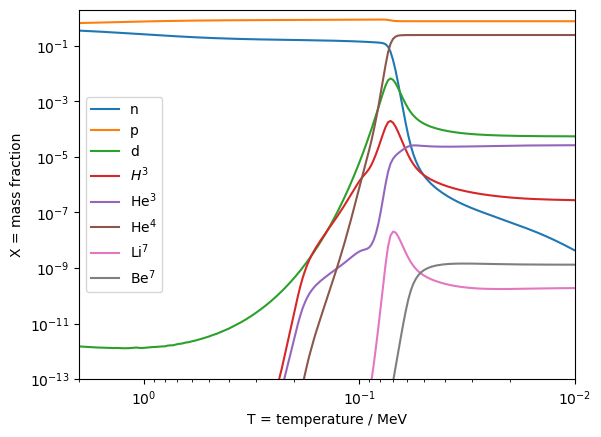

In [160]:
# Plotting the evolution of different mass fraction
index = ['neutron', 'proton', 'deutron', 'tritium',
         'helium3', 'helium4', 'lithium7', 'beryllium7']
label = ['n', 'p', 'd', '$H^3$', r'He$^3$',
         r'He$^4$', r'Li$^7$', r'Be$^7$']

T,X = BBN(5e-10, index, atol=1e-13)
plt.axis([2, 1e-2, 1e-13, 2]) #This list contains four values, specifying the limits for the x and y axes in the format [xmin, xmax, ymin, ymax].
plt.loglog(T, X.T)
plt.xlabel('T = temperature / MeV')
plt.ylabel('X = mass fraction')
plt.legend(label)
plt.show()

As can be seen, the formation of $H^3$ and $He^3$ didnot happen unitil the deutrons become abundant enough. This delay in the synthesis of hevier nuclei is called the deuterium bottleneck. The reaction producing $He^4$ nuclei will start a bit later once $H^3$ and $He^3$ become abundant for enough collison to happen. This is the $He^3$ bottleneck. The p-n collison decreases as the $X_n$ decreses due to neutron decay and the deutrons also decreases and saturates. This is because whatever the amount of deutrons are produced from $p-n$ collisons, equal amount of deutrons get converted to $He^4$. As the universe cools more, there wont be enough collsions between the particles and the abundances saturates . 